# Preparing data for analysis and visualization

## Getting the data

In [162]:
# Importing necessary libraries
import pandas as pd
import os
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
import plotly.express as px

In [163]:
# Getting the data
try:
    project_root = os.path.abspath(os.path.join(os.path.dirname(__file__), '..'))
except NameError:
    project_root = os.path.abspath('..')

resource_path = os.path.join(project_root, 'resource')

data = pd.read_csv(os.path.join(resource_path, 'delinquence.csv'), sep=";")

print("Shape of data:", data.shape)
print("Columns in data:", data.columns.tolist())

Shape of data: (16362, 11)
Columns in data: ['Code_departement', 'Code_region', 'annee', 'indicateur', 'unite_de_compte', 'nombre', 'taux_pour_mille', 'insee_pop', 'insee_pop_millesime', 'insee_log', 'insee_log_millesime']


## Exploring the data

In [164]:
data.head()

,Code_departement,Code_region,annee,indicateur,unite_de_compte,nombre,taux_pour_mille,insee_pop,insee_pop_millesime,insee_log,insee_log_millesime
0,01,84,2016,Homicides,Victime,5,"0,0078318",638425,2016,308491,2016
1,02,32,2016,Homicides,Victime,10,"0,0186520",536136,2016,264180,2016
2,03,84,2016,Homicides,Victime,4,"0,0117861",339384,2016,206980,2016
3,04,93,2016,Homicides,Victime,2,"0,0123028",162565,2016,126760,2016
4,05,93,2016,Homicides,Victime,0,"0,0000000",141107,2016,134647,2016


In [165]:
data.tail()

,Code_departement,Code_region,annee,indicateur,unite_de_compte,nombre,taux_pour_mille,insee_pop,insee_pop_millesime,insee_log,insee_log_millesime
16357,971,1,2024,Escroqueries et fraudes aux moyens de paiement,Victime,1544,"4,0253514",383569,2022,235968,2021
16358,972,2,2024,Escroqueries et fraudes aux moyens de paiement,Victime,1518,"4,2047648",361019,2022,218565,2021
16359,973,3,2024,Escroqueries et fraudes aux moyens de paiement,Victime,693,"2,4030626",288382,2022,98634,2021
16360,974,4,2024,Escroqueries et fraudes aux moyens de paiement,Victime,2741,"3,1100088",881348,2022,395388,2021
16361,976,6,2024,Escroqueries et fraudes aux moyens de paiement,Victime,455,"1,7737547",256518,2017,73880,2017


In [166]:
data.describe()

,Code_region,annee,nombre,insee_pop,insee_pop_millesime,insee_log,insee_log_millesime
count,16362.000000,16362.000000,16362.000000,1.636200e+04,16362.000000,1.636200e+04,16362.000000
mean,52.653465,2020.000000,1794.079086,6.675110e+05,2019.640264,3.633068e+05,2019.310231
std,28.196232,2.582068,4238.287726,5.115253e+05,2.165747,2.603788e+05,1.831367
min,1.000000,2016.000000,0.000000,7.642200e+04,2016.000000,6.039500e+04,2016.000000
25%,27.000000,2018.000000,157.000000,2.833720e+05,2018.000000,1.651150e+05,2018.000000
50%,52.000000,2020.000000,690.000000,5.293740e+05,2020.000000,2.951090e+05,2020.000000
75%,76.000000,2022.000000,1861.750000,8.495830e+05,2022.000000,4.816820e+05,2021.000000
max,94.000000,2024.000000,162378.000000,2.616909e+06,2022.000000,1.396753e+06,2021.000000


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16362 entries, 0 to 16361
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Code_departement     16362 non-null  object
 1   Code_region          16362 non-null  int64 
 2   annee                16362 non-null  int64 
 3   indicateur           16362 non-null  object
 4   unite_de_compte      16362 non-null  object
 5   nombre               16362 non-null  int64 
 6   taux_pour_mille      16362 non-null  object
 7   insee_pop            16362 non-null  int64 
 8   insee_pop_millesime  16362 non-null  int64 
 9   insee_log            16362 non-null  int64 
 10  insee_log_millesime  16362 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.4+ MB


## Cleaning and preparing the data

In [168]:
# Change the feature taux_pour_mille to numeric
data['taux_pour_mille_numeric'] = data['taux_pour_mille'].str.replace(',', '.').astype(float)
data['taux_pour_mille_numeric'].describe()

count    16362.000000
mean         2.428904
std          2.882800
min          0.000000
25%          0.430260
50%          1.644364
75%          3.337708
max         74.986735
Name: taux_pour_mille_numeric, dtype: float64

Text(0.5, 1.0, 'Missing values in the dataset')

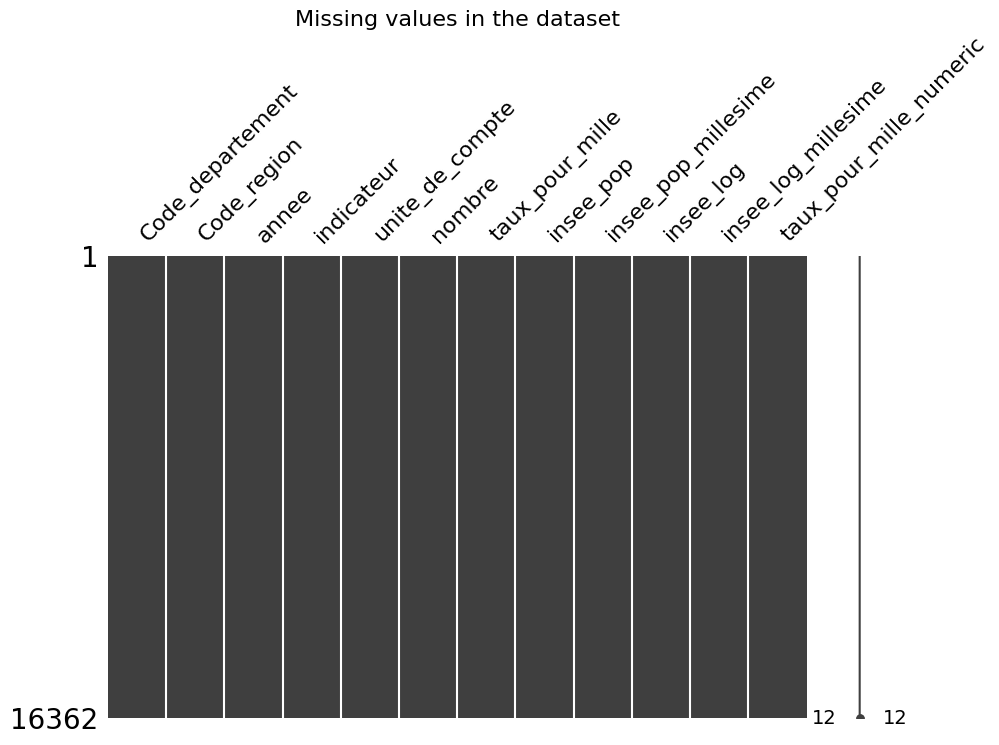

In [169]:
msno.matrix(data, figsize=(10,6)).set_title('Missing values in the dataset', fontsize=16)

In [170]:
missing = data.isna().mean().reset_index()
missing.columns = ['column','missing_fraction']

fig = px.bar(missing.sort_values('missing_fraction', ascending=False),
             x='column', y='missing_fraction',
             title='Portion of missing data per column (fraction)',
             labels={'missing_fraction':'Fraction Missing'})
fig.show()

In [171]:
data.duplicated().sum()

0

**Check the proportion of values originating from the different millesimes**

In [174]:
print("Possible millesimes for population : {}".format(data['insee_pop_millesime'].unique()))
print("Possible millesimes for accomodation : {}".format(data['insee_log_millesime'].unique()))

Possible millesimes for population : [2016 2017 2018 2019 2020 2021 2022]
Possible millesimes for accomodation : [2016 2017 2018 2019 2020 2021]


In [ ]:
for year in data['insee_log_millesime'].unique():
    count = (data['insee_log_millesime'] == year).sum()
    